## Tabular data classification with Deep Learning
Welcome! This notebook introduces some of the basics of data preprocessing for numerical and tabular data in order to classify it using Deep Learning. This notebook includes a custom dataset so that you can use your own data later on as long as they are the same file type (.csv).

You can find more tutorials and notebooks like this [here](https://github.com/sebaspv/do-it-in-keras).

### Libraries used
We are going to use Pandas to read the dataset and do some basic preprocessing on it, and we are also going to use Keras with the TensorFlow backend to create and train our neural network. Scikit-Learn is used for more data preprocessing, and Matplotlib is used to graph the Neural Network's performance.

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.layers import *
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report

### Data preprocessing
We are going to be applying some changes to our data in order to train our model succesfully. Specifically, we are going to encode its classification labels so that they are compatible with Neural Networks.

In [2]:
# read the data with Pandas
dataset = pd.read_csv('./wheat-seeds.csv')
# add column names
dataset.columns = ['t1','t2','t3','t4','t5','t6','t7','class']
# separate the features and the labels from the dataset
X = dataset.drop('class', axis = 1) # features
y = dataset['class'] # labels

### Label encoding and splitting
You might wonder why we split the dataset before transforming it. We do this because this prevents a data leakage from the encoder by making the target labels based on both the training and testing data, which makes our model "cheat" based on these labels.

In [3]:
# split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
# encode y_train and y_test separately to avoid data leakage
encoder = LabelEncoder()
encoder.fit(y_train)
encoded_train = encoder.transform(y_train)
encoded_test = encoder.transform(y_test)
# transform the encoded labels to categorical so that the model can undersand them
cat_train = to_categorical(encoded_train, dtype='float64')
cat_test = to_categorical(encoded_test, dtype='float64')

### Neural network
It's time to implement the neural network! You can use any quantity of neurons per layer or layers, you only need to care about the output layer: It needs to be the same as the quantity of labels that are available in your dataset. In this example we have 3 labels, so our last layer must have 3 neurons.

In [4]:
model = keras.models.Sequential()
model.add(Dense(12,activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(3,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy']) # categorical_crossentropy is used with multi-label classification problems, like this one.

In [5]:
# create an early stop call to prevent overfitting
early_stop = keras.callbacks.EarlyStopping(monitor='val_acc',mode='max',patience=20) # we want to maximize the validation accuracy

In [6]:
# train the model
model.fit(X_train.values,cat_train,epochs=500,batch_size=16,callbacks=[early_stop],validation_data=(X_test.values,cat_test))

Epoch 1/500
11/11 [==============================] - 0s 18ms/step - loss: 1.1943 - accuracy: 0.4491 - val_loss: 1.0149 - val_accuracy: 0.5238
Epoch 2/500
11/11 [==============================] - 0s 4ms/step - loss: 1.0102 - accuracy: 0.5449 - val_loss: 1.0687 - val_accuracy: 0.4524
Epoch 3/500
11/11 [==============================] - 0s 4ms/step - loss: 0.9669 - accuracy: 0.5689 - val_loss: 1.0005 - val_accuracy: 0.5476
Epoch 4/500
11/11 [==============================] - 0s 4ms/step - loss: 0.9309 - accuracy: 0.5629 - val_loss: 0.9402 - val_accuracy: 0.5476
Epoch 5/500
11/11 [==============================] - 0s 4ms/step - loss: 0.9096 - accuracy: 0.5629 - val_loss: 0.9091 - val_accuracy: 0.5476
Epoch 6/500
11/11 [==============================] - 0s 6ms/step - loss: 0.8965 - accuracy: 0.5569 - val_loss: 0.8924 - val_accuracy: 0.5476
Epoch 7/500
11/11 [==============================] - 0s 4ms/step - loss: 0.8777 - accuracy: 0.5629 - val_loss: 0.8737 - val_accuracy: 0.5476
Epoch 8/500


Epoch 23/500
11/11 [==============================] - 0s 5ms/step - loss: 0.6648 - accuracy: 0.8144 - val_loss: 0.7145 - val_accuracy: 0.7143
Epoch 24/500
11/11 [==============================] - 0s 3ms/step - loss: 0.6576 - accuracy: 0.7725 - val_loss: 0.7253 - val_accuracy: 0.5952
Epoch 25/500
11/11 [==============================] - 0s 4ms/step - loss: 0.6467 - accuracy: 0.7725 - val_loss: 0.7071 - val_accuracy: 0.6905
Epoch 26/500
11/11 [==============================] - 0s 3ms/step - loss: 0.6371 - accuracy: 0.7725 - val_loss: 0.6904 - val_accuracy: 0.6905
Epoch 27/500
11/11 [==============================] - 0s 3ms/step - loss: 0.6298 - accuracy: 0.8084 - val_loss: 0.6868 - val_accuracy: 0.7381
Epoch 28/500
11/11 [==============================] - 0s 4ms/step - loss: 0.6213 - accuracy: 0.8144 - val_loss: 0.6731 - val_accuracy: 0.7619
Epoch 29/500
11/11 [==============================] - 0s 5ms/step - loss: 0.6156 - accuracy: 0.7964 - val_loss: 0.6816 - val_accuracy: 0.5476
Epoch 

Epoch 45/500
11/11 [==============================] - 0s 6ms/step - loss: 0.5061 - accuracy: 0.8323 - val_loss: 0.5531 - val_accuracy: 0.8095
Epoch 46/500
11/11 [==============================] - 0s 4ms/step - loss: 0.5021 - accuracy: 0.8443 - val_loss: 0.5242 - val_accuracy: 0.8571
Epoch 47/500
11/11 [==============================] - 0s 4ms/step - loss: 0.4978 - accuracy: 0.8623 - val_loss: 0.5340 - val_accuracy: 0.8095
Epoch 48/500
11/11 [==============================] - 0s 4ms/step - loss: 0.4934 - accuracy: 0.8323 - val_loss: 0.5575 - val_accuracy: 0.8333
Epoch 49/500
11/11 [==============================] - 0s 4ms/step - loss: 0.4838 - accuracy: 0.8503 - val_loss: 0.5081 - val_accuracy: 0.8571
Epoch 50/500
11/11 [==============================] - 0s 5ms/step - loss: 0.4777 - accuracy: 0.8443 - val_loss: 0.5140 - val_accuracy: 0.8095
Epoch 51/500
11/11 [==============================] - 0s 5ms/step - loss: 0.4736 - accuracy: 0.8503 - val_loss: 0.4891 - val_accuracy: 0.8810
Epoch 

Epoch 67/500
11/11 [==============================] - 0s 8ms/step - loss: 0.3960 - accuracy: 0.8743 - val_loss: 0.4234 - val_accuracy: 0.8810
Epoch 68/500
11/11 [==============================] - 0s 7ms/step - loss: 0.3904 - accuracy: 0.8922 - val_loss: 0.4118 - val_accuracy: 0.8810
Epoch 69/500
11/11 [==============================] - 0s 5ms/step - loss: 0.3878 - accuracy: 0.9042 - val_loss: 0.3795 - val_accuracy: 0.9524
Epoch 70/500
11/11 [==============================] - 0s 5ms/step - loss: 0.3831 - accuracy: 0.8922 - val_loss: 0.3975 - val_accuracy: 0.8810
Epoch 71/500
11/11 [==============================] - 0s 5ms/step - loss: 0.3824 - accuracy: 0.8623 - val_loss: 0.4193 - val_accuracy: 0.8810
Epoch 72/500
11/11 [==============================] - 0s 5ms/step - loss: 0.3868 - accuracy: 0.8802 - val_loss: 0.3795 - val_accuracy: 0.9286
Epoch 73/500
11/11 [==============================] - 0s 6ms/step - loss: 0.3789 - accuracy: 0.8922 - val_loss: 0.3889 - val_accuracy: 0.9048
Epoch 

Epoch 89/500
11/11 [==============================] - 0s 5ms/step - loss: 0.3295 - accuracy: 0.9042 - val_loss: 0.3112 - val_accuracy: 0.9286
Epoch 90/500
11/11 [==============================] - 0s 5ms/step - loss: 0.3145 - accuracy: 0.8922 - val_loss: 0.3387 - val_accuracy: 0.8810
Epoch 91/500
11/11 [==============================] - 0s 5ms/step - loss: 0.3142 - accuracy: 0.9042 - val_loss: 0.3261 - val_accuracy: 0.9048
Epoch 92/500
11/11 [==============================] - 0s 4ms/step - loss: 0.3125 - accuracy: 0.9102 - val_loss: 0.3169 - val_accuracy: 0.9048
Epoch 93/500
11/11 [==============================] - 0s 4ms/step - loss: 0.3149 - accuracy: 0.9042 - val_loss: 0.3120 - val_accuracy: 0.9048
Epoch 94/500
11/11 [==============================] - 0s 4ms/step - loss: 0.3075 - accuracy: 0.8982 - val_loss: 0.3166 - val_accuracy: 0.9048
Epoch 95/500
11/11 [==============================] - 0s 5ms/step - loss: 0.3070 - accuracy: 0.9102 - val_loss: 0.2993 - val_accuracy: 0.9286
Epoch 

Epoch 111/500
11/11 [==============================] - 0s 4ms/step - loss: 0.2772 - accuracy: 0.8982 - val_loss: 0.2868 - val_accuracy: 0.9048
Epoch 112/500
11/11 [==============================] - 0s 4ms/step - loss: 0.2765 - accuracy: 0.8982 - val_loss: 0.2695 - val_accuracy: 0.9286
Epoch 113/500
11/11 [==============================] - 0s 4ms/step - loss: 0.2712 - accuracy: 0.9102 - val_loss: 0.2750 - val_accuracy: 0.9048
Epoch 114/500
11/11 [==============================] - 0s 4ms/step - loss: 0.2712 - accuracy: 0.9102 - val_loss: 0.2901 - val_accuracy: 0.9048
Epoch 115/500
11/11 [==============================] - 0s 4ms/step - loss: 0.2708 - accuracy: 0.9042 - val_loss: 0.2730 - val_accuracy: 0.9048
Epoch 116/500
11/11 [==============================] - 0s 4ms/step - loss: 0.2661 - accuracy: 0.9102 - val_loss: 0.2748 - val_accuracy: 0.9048
Epoch 117/500
11/11 [==============================] - 0s 4ms/step - loss: 0.2655 - accuracy: 0.9102 - val_loss: 0.2822 - val_accuracy: 0.9048

Epoch 133/500
11/11 [==============================] - 0s 4ms/step - loss: 0.2448 - accuracy: 0.9102 - val_loss: 0.2796 - val_accuracy: 0.9048
Epoch 134/500
11/11 [==============================] - 0s 4ms/step - loss: 0.2477 - accuracy: 0.9042 - val_loss: 0.2673 - val_accuracy: 0.9048
Epoch 135/500
11/11 [==============================] - 0s 4ms/step - loss: 0.2427 - accuracy: 0.9162 - val_loss: 0.2492 - val_accuracy: 0.9048
Epoch 136/500
11/11 [==============================] - 0s 3ms/step - loss: 0.2499 - accuracy: 0.9162 - val_loss: 0.2482 - val_accuracy: 0.9286
Epoch 137/500
11/11 [==============================] - 0s 3ms/step - loss: 0.2484 - accuracy: 0.9162 - val_loss: 0.2681 - val_accuracy: 0.9048
Epoch 138/500
11/11 [==============================] - 0s 3ms/step - loss: 0.2552 - accuracy: 0.8982 - val_loss: 0.2794 - val_accuracy: 0.8810
Epoch 139/500
11/11 [==============================] - 0s 4ms/step - loss: 0.2535 - accuracy: 0.9042 - val_loss: 0.2539 - val_accuracy: 0.9048

Epoch 155/500
11/11 [==============================] - 0s 4ms/step - loss: 0.2364 - accuracy: 0.9222 - val_loss: 0.2522 - val_accuracy: 0.9048
Epoch 156/500
11/11 [==============================] - 0s 4ms/step - loss: 0.2284 - accuracy: 0.9102 - val_loss: 0.2483 - val_accuracy: 0.9048
Epoch 157/500
11/11 [==============================] - 0s 4ms/step - loss: 0.2283 - accuracy: 0.9102 - val_loss: 0.2580 - val_accuracy: 0.9048
Epoch 158/500
11/11 [==============================] - 0s 4ms/step - loss: 0.2254 - accuracy: 0.9222 - val_loss: 0.2462 - val_accuracy: 0.9048
Epoch 159/500
11/11 [==============================] - 0s 4ms/step - loss: 0.2236 - accuracy: 0.9162 - val_loss: 0.2388 - val_accuracy: 0.9048
Epoch 160/500
11/11 [==============================] - 0s 4ms/step - loss: 0.2256 - accuracy: 0.9222 - val_loss: 0.2583 - val_accuracy: 0.9048
Epoch 161/500
11/11 [==============================] - 0s 3ms/step - loss: 0.2251 - accuracy: 0.9162 - val_loss: 0.2290 - val_accuracy: 0.9048

Epoch 177/500
11/11 [==============================] - 0s 4ms/step - loss: 0.2201 - accuracy: 0.9042 - val_loss: 0.2284 - val_accuracy: 0.9286
Epoch 178/500
11/11 [==============================] - 0s 5ms/step - loss: 0.2134 - accuracy: 0.9162 - val_loss: 0.2450 - val_accuracy: 0.9048
Epoch 179/500
11/11 [==============================] - 0s 4ms/step - loss: 0.2202 - accuracy: 0.9042 - val_loss: 0.2497 - val_accuracy: 0.9048
Epoch 180/500
11/11 [==============================] - 0s 4ms/step - loss: 0.2142 - accuracy: 0.9341 - val_loss: 0.2464 - val_accuracy: 0.9048
Epoch 181/500
11/11 [==============================] - 0s 5ms/step - loss: 0.2114 - accuracy: 0.9341 - val_loss: 0.2499 - val_accuracy: 0.8810
Epoch 182/500
11/11 [==============================] - 0s 5ms/step - loss: 0.2235 - accuracy: 0.9222 - val_loss: 0.2390 - val_accuracy: 0.9048
Epoch 183/500
11/11 [==============================] - 0s 5ms/step - loss: 0.2198 - accuracy: 0.9042 - val_loss: 0.2359 - val_accuracy: 0.9048

Epoch 199/500
11/11 [==============================] - 0s 6ms/step - loss: 0.2077 - accuracy: 0.9222 - val_loss: 0.2348 - val_accuracy: 0.9048
Epoch 200/500
11/11 [==============================] - 0s 5ms/step - loss: 0.2043 - accuracy: 0.9281 - val_loss: 0.2580 - val_accuracy: 0.8810
Epoch 201/500
11/11 [==============================] - 0s 5ms/step - loss: 0.2033 - accuracy: 0.9162 - val_loss: 0.2354 - val_accuracy: 0.9048
Epoch 202/500
11/11 [==============================] - 0s 5ms/step - loss: 0.2068 - accuracy: 0.9222 - val_loss: 0.2169 - val_accuracy: 0.9286
Epoch 203/500
11/11 [==============================] - 0s 7ms/step - loss: 0.2032 - accuracy: 0.9222 - val_loss: 0.2395 - val_accuracy: 0.9048
Epoch 204/500
11/11 [==============================] - 0s 5ms/step - loss: 0.2111 - accuracy: 0.9162 - val_loss: 0.2450 - val_accuracy: 0.9048
Epoch 205/500
11/11 [==============================] - 0s 5ms/step - loss: 0.2048 - accuracy: 0.9222 - val_loss: 0.2277 - val_accuracy: 0.9048

Epoch 221/500
11/11 [==============================] - 0s 5ms/step - loss: 0.1960 - accuracy: 0.9341 - val_loss: 0.2227 - val_accuracy: 0.9048
Epoch 222/500
11/11 [==============================] - 0s 5ms/step - loss: 0.1984 - accuracy: 0.9401 - val_loss: 0.2390 - val_accuracy: 0.9048
Epoch 223/500
11/11 [==============================] - 0s 5ms/step - loss: 0.1992 - accuracy: 0.9281 - val_loss: 0.2335 - val_accuracy: 0.9048
Epoch 224/500
11/11 [==============================] - 0s 4ms/step - loss: 0.1958 - accuracy: 0.9341 - val_loss: 0.2349 - val_accuracy: 0.9048
Epoch 225/500
11/11 [==============================] - 0s 4ms/step - loss: 0.1995 - accuracy: 0.9222 - val_loss: 0.2265 - val_accuracy: 0.9048
Epoch 226/500
11/11 [==============================] - 0s 6ms/step - loss: 0.2069 - accuracy: 0.9162 - val_loss: 0.2539 - val_accuracy: 0.9048
Epoch 227/500
11/11 [==============================] - 0s 5ms/step - loss: 0.1937 - accuracy: 0.9222 - val_loss: 0.2163 - val_accuracy: 0.9286

Epoch 243/500
11/11 [==============================] - 0s 4ms/step - loss: 0.1945 - accuracy: 0.9281 - val_loss: 0.2258 - val_accuracy: 0.9048
Epoch 244/500
11/11 [==============================] - 0s 4ms/step - loss: 0.1943 - accuracy: 0.9281 - val_loss: 0.2214 - val_accuracy: 0.9048
Epoch 245/500
11/11 [==============================] - 0s 4ms/step - loss: 0.1937 - accuracy: 0.9162 - val_loss: 0.2314 - val_accuracy: 0.8810
Epoch 246/500
11/11 [==============================] - 0s 4ms/step - loss: 0.1880 - accuracy: 0.9341 - val_loss: 0.2470 - val_accuracy: 0.9048
Epoch 247/500
11/11 [==============================] - 0s 4ms/step - loss: 0.2002 - accuracy: 0.9102 - val_loss: 0.2226 - val_accuracy: 0.9048
Epoch 248/500
11/11 [==============================] - 0s 4ms/step - loss: 0.1923 - accuracy: 0.9102 - val_loss: 0.2287 - val_accuracy: 0.9048
Epoch 249/500
11/11 [==============================] - 0s 4ms/step - loss: 0.1921 - accuracy: 0.9341 - val_loss: 0.2291 - val_accuracy: 0.9048

Epoch 265/500
11/11 [==============================] - 0s 4ms/step - loss: 0.1935 - accuracy: 0.9042 - val_loss: 0.2420 - val_accuracy: 0.9048
Epoch 266/500
11/11 [==============================] - 0s 4ms/step - loss: 0.1891 - accuracy: 0.9281 - val_loss: 0.2235 - val_accuracy: 0.9048
Epoch 267/500
11/11 [==============================] - 0s 4ms/step - loss: 0.1827 - accuracy: 0.9281 - val_loss: 0.2109 - val_accuracy: 0.9286
Epoch 268/500
11/11 [==============================] - 0s 4ms/step - loss: 0.1835 - accuracy: 0.9222 - val_loss: 0.2420 - val_accuracy: 0.9048
Epoch 269/500
11/11 [==============================] - 0s 4ms/step - loss: 0.1970 - accuracy: 0.9162 - val_loss: 0.2274 - val_accuracy: 0.9048
Epoch 270/500
11/11 [==============================] - 0s 4ms/step - loss: 0.1954 - accuracy: 0.9281 - val_loss: 0.2230 - val_accuracy: 0.9048
Epoch 271/500
11/11 [==============================] - 0s 4ms/step - loss: 0.1842 - accuracy: 0.9341 - val_loss: 0.2341 - val_accuracy: 0.9048

Epoch 287/500
11/11 [==============================] - 0s 4ms/step - loss: 0.1878 - accuracy: 0.9102 - val_loss: 0.2455 - val_accuracy: 0.9048
Epoch 288/500
11/11 [==============================] - 0s 4ms/step - loss: 0.1810 - accuracy: 0.9222 - val_loss: 0.2049 - val_accuracy: 0.9286
Epoch 289/500
11/11 [==============================] - 0s 4ms/step - loss: 0.1863 - accuracy: 0.9222 - val_loss: 0.2250 - val_accuracy: 0.9048
Epoch 290/500
11/11 [==============================] - 0s 3ms/step - loss: 0.1817 - accuracy: 0.9281 - val_loss: 0.2259 - val_accuracy: 0.9048
Epoch 291/500
11/11 [==============================] - 0s 4ms/step - loss: 0.2016 - accuracy: 0.9162 - val_loss: 0.2111 - val_accuracy: 0.9048
Epoch 292/500
11/11 [==============================] - 0s 4ms/step - loss: 0.1861 - accuracy: 0.9222 - val_loss: 0.2459 - val_accuracy: 0.9048
Epoch 293/500
11/11 [==============================] - 0s 4ms/step - loss: 0.1795 - accuracy: 0.9281 - val_loss: 0.2271 - val_accuracy: 0.9048

Epoch 309/500
11/11 [==============================] - 0s 6ms/step - loss: 0.1844 - accuracy: 0.9222 - val_loss: 0.2256 - val_accuracy: 0.9048
Epoch 310/500
11/11 [==============================] - 0s 4ms/step - loss: 0.1797 - accuracy: 0.9281 - val_loss: 0.2324 - val_accuracy: 0.9048
Epoch 311/500
11/11 [==============================] - 0s 4ms/step - loss: 0.1791 - accuracy: 0.9341 - val_loss: 0.2124 - val_accuracy: 0.9048
Epoch 312/500
11/11 [==============================] - 0s 6ms/step - loss: 0.1793 - accuracy: 0.9401 - val_loss: 0.2361 - val_accuracy: 0.9048
Epoch 313/500
11/11 [==============================] - 0s 6ms/step - loss: 0.1779 - accuracy: 0.9341 - val_loss: 0.2146 - val_accuracy: 0.9048
Epoch 314/500
11/11 [==============================] - 0s 6ms/step - loss: 0.1825 - accuracy: 0.9341 - val_loss: 0.2174 - val_accuracy: 0.9048
Epoch 315/500
11/11 [==============================] - 0s 5ms/step - loss: 0.1760 - accuracy: 0.9222 - val_loss: 0.2475 - val_accuracy: 0.9048

Epoch 331/500
11/11 [==============================] - 0s 4ms/step - loss: 0.1749 - accuracy: 0.9281 - val_loss: 0.2335 - val_accuracy: 0.9048
Epoch 332/500
11/11 [==============================] - 0s 4ms/step - loss: 0.1764 - accuracy: 0.9401 - val_loss: 0.2215 - val_accuracy: 0.9048
Epoch 333/500
11/11 [==============================] - 0s 4ms/step - loss: 0.1779 - accuracy: 0.9281 - val_loss: 0.2088 - val_accuracy: 0.9048
Epoch 334/500
11/11 [==============================] - 0s 4ms/step - loss: 0.1841 - accuracy: 0.9222 - val_loss: 0.2426 - val_accuracy: 0.9048
Epoch 335/500
11/11 [==============================] - 0s 4ms/step - loss: 0.1823 - accuracy: 0.9162 - val_loss: 0.2236 - val_accuracy: 0.9048
Epoch 336/500
11/11 [==============================] - 0s 4ms/step - loss: 0.1728 - accuracy: 0.9341 - val_loss: 0.1994 - val_accuracy: 0.9048
Epoch 337/500
11/11 [==============================] - 0s 3ms/step - loss: 0.1777 - accuracy: 0.9281 - val_loss: 0.2425 - val_accuracy: 0.9048

Epoch 353/500
11/11 [==============================] - 0s 3ms/step - loss: 0.1733 - accuracy: 0.9222 - val_loss: 0.2217 - val_accuracy: 0.9048
Epoch 354/500
11/11 [==============================] - 0s 4ms/step - loss: 0.1718 - accuracy: 0.9222 - val_loss: 0.2164 - val_accuracy: 0.9048
Epoch 355/500
11/11 [==============================] - 0s 4ms/step - loss: 0.1712 - accuracy: 0.9281 - val_loss: 0.2345 - val_accuracy: 0.9048
Epoch 356/500
11/11 [==============================] - 0s 4ms/step - loss: 0.1752 - accuracy: 0.9281 - val_loss: 0.2279 - val_accuracy: 0.9048
Epoch 357/500
11/11 [==============================] - 0s 4ms/step - loss: 0.1762 - accuracy: 0.9281 - val_loss: 0.2256 - val_accuracy: 0.9048
Epoch 358/500
11/11 [==============================] - 0s 4ms/step - loss: 0.1706 - accuracy: 0.9281 - val_loss: 0.2177 - val_accuracy: 0.9048
Epoch 359/500
11/11 [==============================] - 0s 5ms/step - loss: 0.1721 - accuracy: 0.9222 - val_loss: 0.2246 - val_accuracy: 0.9048

Epoch 375/500
11/11 [==============================] - 0s 4ms/step - loss: 0.1661 - accuracy: 0.9341 - val_loss: 0.2286 - val_accuracy: 0.9048
Epoch 376/500
11/11 [==============================] - 0s 4ms/step - loss: 0.1730 - accuracy: 0.9162 - val_loss: 0.2265 - val_accuracy: 0.9048
Epoch 377/500
11/11 [==============================] - 0s 4ms/step - loss: 0.1773 - accuracy: 0.9162 - val_loss: 0.2270 - val_accuracy: 0.9048
Epoch 378/500
11/11 [==============================] - 0s 4ms/step - loss: 0.1885 - accuracy: 0.9042 - val_loss: 0.2256 - val_accuracy: 0.9048
Epoch 379/500
11/11 [==============================] - 0s 5ms/step - loss: 0.1695 - accuracy: 0.9281 - val_loss: 0.2291 - val_accuracy: 0.9048
Epoch 380/500
11/11 [==============================] - 0s 4ms/step - loss: 0.1714 - accuracy: 0.9341 - val_loss: 0.2082 - val_accuracy: 0.9048
Epoch 381/500
11/11 [==============================] - 0s 4ms/step - loss: 0.1721 - accuracy: 0.9222 - val_loss: 0.2236 - val_accuracy: 0.9048

Epoch 397/500
11/11 [==============================] - 0s 4ms/step - loss: 0.1735 - accuracy: 0.9281 - val_loss: 0.2398 - val_accuracy: 0.9048
Epoch 398/500
11/11 [==============================] - 0s 4ms/step - loss: 0.1691 - accuracy: 0.9281 - val_loss: 0.2060 - val_accuracy: 0.9048
Epoch 399/500
11/11 [==============================] - 0s 4ms/step - loss: 0.1666 - accuracy: 0.9341 - val_loss: 0.2324 - val_accuracy: 0.9048
Epoch 400/500
11/11 [==============================] - 0s 5ms/step - loss: 0.1655 - accuracy: 0.9281 - val_loss: 0.2239 - val_accuracy: 0.9048
Epoch 401/500
11/11 [==============================] - 0s 4ms/step - loss: 0.1686 - accuracy: 0.9162 - val_loss: 0.2238 - val_accuracy: 0.9048
Epoch 402/500
11/11 [==============================] - 0s 4ms/step - loss: 0.1677 - accuracy: 0.9341 - val_loss: 0.2181 - val_accuracy: 0.9048
Epoch 403/500
11/11 [==============================] - 0s 4ms/step - loss: 0.1835 - accuracy: 0.9222 - val_loss: 0.2325 - val_accuracy: 0.9048

Epoch 419/500
11/11 [==============================] - 0s 4ms/step - loss: 0.1729 - accuracy: 0.9222 - val_loss: 0.2233 - val_accuracy: 0.9048
Epoch 420/500
11/11 [==============================] - 0s 3ms/step - loss: 0.1645 - accuracy: 0.9341 - val_loss: 0.2259 - val_accuracy: 0.9048
Epoch 421/500
11/11 [==============================] - 0s 3ms/step - loss: 0.1629 - accuracy: 0.9222 - val_loss: 0.2295 - val_accuracy: 0.9048
Epoch 422/500
11/11 [==============================] - 0s 3ms/step - loss: 0.1642 - accuracy: 0.9222 - val_loss: 0.2256 - val_accuracy: 0.9048
Epoch 423/500
11/11 [==============================] - 0s 4ms/step - loss: 0.1623 - accuracy: 0.9222 - val_loss: 0.2160 - val_accuracy: 0.9048
Epoch 424/500
11/11 [==============================] - 0s 4ms/step - loss: 0.1614 - accuracy: 0.9222 - val_loss: 0.2183 - val_accuracy: 0.9048
Epoch 425/500
11/11 [==============================] - 0s 4ms/step - loss: 0.1684 - accuracy: 0.9341 - val_loss: 0.2287 - val_accuracy: 0.9048

Epoch 441/500
11/11 [==============================] - 0s 4ms/step - loss: 0.1611 - accuracy: 0.9281 - val_loss: 0.2273 - val_accuracy: 0.9048
Epoch 442/500
11/11 [==============================] - 0s 4ms/step - loss: 0.1624 - accuracy: 0.9222 - val_loss: 0.2220 - val_accuracy: 0.9048
Epoch 443/500
11/11 [==============================] - 0s 5ms/step - loss: 0.1630 - accuracy: 0.9281 - val_loss: 0.2250 - val_accuracy: 0.9048
Epoch 444/500
11/11 [==============================] - 0s 5ms/step - loss: 0.1605 - accuracy: 0.9281 - val_loss: 0.2227 - val_accuracy: 0.9048
Epoch 445/500
11/11 [==============================] - 0s 5ms/step - loss: 0.1606 - accuracy: 0.9341 - val_loss: 0.2055 - val_accuracy: 0.9048
Epoch 446/500
11/11 [==============================] - 0s 4ms/step - loss: 0.1653 - accuracy: 0.9281 - val_loss: 0.2052 - val_accuracy: 0.9048
Epoch 447/500
11/11 [==============================] - 0s 3ms/step - loss: 0.1729 - accuracy: 0.9222 - val_loss: 0.2411 - val_accuracy: 0.9048

Epoch 463/500
11/11 [==============================] - 0s 4ms/step - loss: 0.1635 - accuracy: 0.9162 - val_loss: 0.2213 - val_accuracy: 0.9048
Epoch 464/500
11/11 [==============================] - 0s 4ms/step - loss: 0.1593 - accuracy: 0.9162 - val_loss: 0.2268 - val_accuracy: 0.9048
Epoch 465/500
11/11 [==============================] - 0s 4ms/step - loss: 0.1618 - accuracy: 0.9281 - val_loss: 0.2325 - val_accuracy: 0.9048
Epoch 466/500
11/11 [==============================] - 0s 3ms/step - loss: 0.1565 - accuracy: 0.9222 - val_loss: 0.2068 - val_accuracy: 0.9048
Epoch 467/500
11/11 [==============================] - 0s 3ms/step - loss: 0.1648 - accuracy: 0.9281 - val_loss: 0.2274 - val_accuracy: 0.9048
Epoch 468/500
11/11 [==============================] - 0s 4ms/step - loss: 0.1575 - accuracy: 0.9341 - val_loss: 0.2262 - val_accuracy: 0.9048
Epoch 469/500
11/11 [==============================] - 0s 4ms/step - loss: 0.1603 - accuracy: 0.9401 - val_loss: 0.2303 - val_accuracy: 0.9048

Epoch 485/500
11/11 [==============================] - 0s 4ms/step - loss: 0.1622 - accuracy: 0.9162 - val_loss: 0.2513 - val_accuracy: 0.9048
Epoch 486/500
11/11 [==============================] - 0s 3ms/step - loss: 0.1623 - accuracy: 0.9281 - val_loss: 0.2282 - val_accuracy: 0.9048
Epoch 487/500
11/11 [==============================] - 0s 4ms/step - loss: 0.1609 - accuracy: 0.9162 - val_loss: 0.2296 - val_accuracy: 0.9048
Epoch 488/500
11/11 [==============================] - 0s 3ms/step - loss: 0.1554 - accuracy: 0.9222 - val_loss: 0.2232 - val_accuracy: 0.9048
Epoch 489/500
11/11 [==============================] - 0s 4ms/step - loss: 0.1604 - accuracy: 0.9341 - val_loss: 0.2096 - val_accuracy: 0.9048
Epoch 490/500
11/11 [==============================] - 0s 4ms/step - loss: 0.1631 - accuracy: 0.9281 - val_loss: 0.2320 - val_accuracy: 0.9048
Epoch 491/500
11/11 [==============================] - 0s 3ms/step - loss: 0.1670 - accuracy: 0.9222 - val_loss: 0.2320 - val_accuracy: 0.9048

### After training
Our model is pretty good! We achieved a final validation accuracy of 81%. Try to modify the layers or neurons in each of them to see if you get a better accuracy! If you do, feel free to create a pull request [here!](https://github.com/sebaspv/do-it-in-keras/tree/main).
Now, we need to monitor our model's accuracy to see how it progressed with each epoch. By doing this, we can see where the peak accuracy was to train it again only in that quantity of epochs.

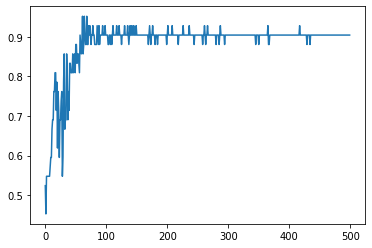

In [19]:
# plot our model validation accuracy
if 'val_accuracy' in model.history.history:
    training_history = model.history.history['val_accuracy']
else:
    training_history = model.history.history['val_acc']
plt.plot(training_history)

### Conclusion
Our model did pretty good. The top validation accuracy was also the last epoch, so there's no need to train the model again. As you can see, tabular data is easier to train models with since they're pure numerical data.
### Task
Try implementing your own multi-label classification neural network on tabular data!